## 📗📊 Economic Performance of India since 2012: GDP Analysis and Forecasting

    Thrilled to share my data-centric project on India's GDP analysis since 2012! 📈✨ Dive into a captivating exploration of the Indian economy as I unravel its dynamic growth patterns, sector-wise decomposition, and cutting-edge GDP forecasting using ARIMA and VAR models. 🌐💡 From unearthing fascinating insights to unveiling future trends, this project showcases the power of data in deciphering India's economic landscape. Join me on this exhilarating journey as we unlock the secrets behind India's GDP growth and its implications for the future. Let's connect and explore the fascinating world of economic analysis together! #DataDriven #GDPAnalysis #ForecastingExcellence



India's GDP stands as a dynamic testament to the nation's economic resilience and growth potential. As one of the world's fastest-growing major economies, India has made remarkable strides in various sectors, catapulting its GDP to new heights. From the bustling service industry to the vibrant manufacturing sector and the vast agricultural landscape, India's GDP reflects the diverse tapestry of its economic landscape.
<img src="https://images.moneycontrol.com/static-mcnews/2020/07/rupixen-com-KzUiI7ENbws-unsplash-653x435.jpg?impolicy=website&width=770&height=431" style="padding: 10px"> <br/>

 🧮 Amidst a backdrop of challenges and opportunities, India's GDP remains a captivating subject of analysis, projecting a story of resilience, ambition, and a bright future on the global stage.

In this notebook, we investigate quarterly GDP data to answer the questions:

<div style="background-color:#EEE4E1; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
<ul>
    <li> <b>Historical Peformance:</b> What has been the pattern of growth rate of the economic output? </li>
    <li><b>Sectoral Analysis:</b>Which sectors are the major drivers of growth- agriculture, manufacturing or service?</li>
    <li><b>Economic Components:</b>Do factors like consumption, investment, trade balance affect the overall GDP growth?</li>
    <li><b>Volatility and Stability:</b> Whether the trends are consistent over long periods of time</li>
</ul>
    Then we attempt at forecasting the GDP using <b>ARIMA and VAR models</b>. Which model yields a better result? </div>


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Load files
file="C:/Users/debad/OneDrive/Documents/DATASETS/gdp_mospi.xlsx"
df = pd.ExcelFile(file)
print(df.sheet_names)

['Quarterly GDP Estimates', 'Quarterly Growth rates']


In [3]:
data = df.parse('Quarterly GDP Estimates')
data.head()

,Year,Quarter,"Agriculture, forestry & fishing",Mining & quarrying,Manufacturing,"Electricity, gas ,water supply& other utility services",Construction,"Trade, hotels, transport, communication and services related to broadcasting","Financial, real estate & professional services","Public administration, defence and Other Services",...,GDP,GFCE,PFCE,GFCF,CIS,Valuables,Exports of goods and services,Imports of goods and services,Discrepancies,GDP
0,2011,Q1,336108.837872,67872.924658,356022.307636,46302.441025,186776.635750,338657.917954,404493.013704,232898.349271,...,2.102863e+06,204165.145867,1.236604e+06,696954.790960,52515.895197,59926.727767,506866.908703,643806.286560,-10364.720911,2.102863e+06
1,2011,Q2,269074.120788,56967.374724,333104.492765,46466.052632,190701.474133,340496.563404,410625.898891,265771.159391,...,2.042870e+06,257146.702583,1.127293e+06,727748.916840,49135.349826,65430.202766,507189.192295,640633.573165,-50439.559969,2.042870e+06
2,2011,Q3,500965.575442,64848.794939,333674.453313,46622.948843,195723.780538,348957.071476,340343.238557,242759.667520,...,2.225135e+06,220375.098457,1.264940e+06,752161.741590,49219.423177,60517.138878,553499.208075,713920.562734,38343.680297,2.225135e+06
3,2012,Q4,395797.545600,71346.273845,387183.996802,47276.557500,204132.571964,385005.514425,375416.487571,284552.607657,...,2.365461e+06,286688.053093,1.281610e+06,820867.224127,57112.472342,67159.263877,576375.690928,717193.577541,-7158.225266,2.365461e+06
4,2012,Q1,341199.185055,70780.174531,358339.680659,48479.919231,189865.800840,374094.991915,442486.832906,249342.585986,...,2.205223e+06,228822.602509,1.225157e+06,763691.785436,48568.685149,69769.107582,532776.122885,677719.585266,14157.907685,2.205223e+06


### Indexing into Time-Series data
Government of India follows Fiscal Year format from 1st April to 31st March; the quarters being-
  - Q1: April-June 
  - Q2: July-September
  - Q3: October-December
  - Q4: January-March

In [4]:
#Transforming the Year and Quarter columns to formats appropriate for analysis!
quarter_mapping = {
    'Q1': '04',
    'Q2': '07',
    'Q3': '10',
    'Q4': '01'}
data['Quarter'] = data['Quarter'].replace(quarter_mapping)

#Merging the Year and Quarter into single column 'Period'.
data['Period'] = data['Year'].astype(str) + '-' + data['Quarter'].astype(str)
data['Period'] = pd.to_datetime(data.Period)
#data['Period'] = pd.PeriodIndex(data.Period, freq= 'M')

#Setting index
data.set_index('Period', inplace= True)
data

,Year,Quarter,"Agriculture, forestry & fishing",Mining & quarrying,Manufacturing,"Electricity, gas ,water supply& other utility services",Construction,"Trade, hotels, transport, communication and services related to broadcasting","Financial, real estate & professional services","Public administration, defence and Other Services",...,GDP,GFCE,PFCE,GFCF,CIS,Valuables,Exports of goods and services,Imports of goods and services,Discrepancies,GDP
Period,,,,,,,,,,,,,,,,,,,,,
2011-04-01,2011,04,336108.837872,67872.924658,356022.307636,46302.441025,186776.635750,338657.917954,404493.013704,232898.349271,...,2.102863e+06,204165.145867,1.236604e+06,6.969548e+05,52515.895197,59926.727767,506866.908703,6.438063e+05,-10364.720911,2.102863e+06
2011-07-01,2011,07,269074.120788,56967.374724,333104.492765,46466.052632,190701.474133,340496.563404,410625.898891,265771.159391,...,2.042870e+06,257146.702583,1.127293e+06,7.277489e+05,49135.349826,65430.202766,507189.192295,6.406336e+05,-50439.559969,2.042870e+06
2011-10-01,2011,10,500965.575442,64848.794939,333674.453313,46622.948843,195723.780538,348957.071476,340343.238557,242759.667520,...,2.225135e+06,220375.098457,1.264940e+06,7.521617e+05,49219.423177,60517.138878,553499.208075,7.139206e+05,38343.680297,2.225135e+06
2012-01-01,2012,01,395797.545600,71346.273845,387183.996802,47276.557500,204132.571964,385005.514425,375416.487571,284552.607657,...,2.365461e+06,286688.053093,1.281610e+06,8.208672e+05,57112.472342,67159.263877,576375.690928,7.171936e+05,-7158.225266,2.365461e+06
2012-04-01,2012,04,341199.185055,70780.174531,358339.680659,48479.919231,189865.800840,374094.991915,442486.832906,249342.585986,...,2.205223e+06,228822.602509,1.225157e+06,7.636918e+05,48568.685149,69769.107582,532776.122885,6.777196e+05,14157.907685,2.205223e+06
2012-07-01,2012,07,274362.464673,55618.240847,373953.332189,47289.983333,186137.154535,376920.593887,452821.426566,280805.536894,...,2.195946e+06,286153.237976,1.224959e+06,7.672350e+05,50684.930059,64580.460997,652251.175379,7.454137e+05,-104504.040956,2.195946e+06
2012-10-01,2012,10,506048.758169,64858.701146,355777.885469,48003.944872,194069.248203,383184.319646,377983.124670,247602.217857,...,2.344767e+06,189644.938133,1.377374e+06,7.693389e+05,48221.464256,60195.958901,528616.536766,7.360316e+05,107406.586676,2.344767e+06
2013-01-01,2013,01,402678.096789,71351.526439,398803.208235,47861.152564,209977.903383,416943.026138,406740.090544,291895.986272,...,2.467082e+06,269642.191061,1.351602e+06,8.455275e+05,54053.035438,65403.751783,576192.149015,7.199142e+05,24575.789141,2.467082e+06
2013-04-01,2013,04,354449.519951,68133.940002,383075.916886,49464.098647,198716.437324,388784.293136,494882.783999,268722.604231,...,2.347396e+06,272180.589833,1.321379e+06,7.855249e+05,31849.089814,37116.573564,550329.833654,6.573634e+05,6380.147125,2.347396e+06


In [5]:
#Renaming
columns ={
         'Agriculture, forestry & fishing': 'agri', 
         'Mining & quarrying': 'mining',
         'Manufacturing' : 'manufacturing',
         'Electricity, gas ,water supply& other utility services': 'electricity',
         'Construction' : 'construction',
         'Trade, hotels, transport, communication and services related to broadcasting ': 'trade',
         'Financial,  real estate  &  professional  services ': 'financial',
         'Public administration, defence  and Other Services' : 'public_sector',
         'Exports of goods and services' : 'exports', 'Imports of goods and services' : 'imports', 'GDP ': 'GDP',
         'GFCE':'govt_spending','PFCE':'pvt_consumption', 'GFCF':'investment'}

data= data.rename(columns = columns)
data = data.iloc[:, :-1]
data.columns

Index(['Year', 'Quarter', 'agri', 'mining', 'manufacturing', 'electricity',
       'construction', 'trade', 'financial', 'public_sector',
       'GVA at Basic Price', 'GDP', 'govt_spending', 'pvt_consumption',
       'investment', 'CIS', 'Valuables', 'exports', 'imports',
       'Discrepancies '],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-04-01 to 2023-01-01
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                48 non-null     int64  
 1   Quarter             48 non-null     object 
 2   agri                48 non-null     float64
 3   mining              48 non-null     float64
 4   manufacturing       48 non-null     float64
 5   electricity         48 non-null     float64
 6   construction        48 non-null     float64
 7   trade               48 non-null     float64
 8   financial           48 non-null     float64
 9   public_sector       48 non-null     float64
 10  GVA at Basic Price  48 non-null     float64
 11  GDP                 48 non-null     float64
 12  govt_spending       48 non-null     float64
 13  pvt_consumption     48 non-null     float64
 14  investment          48 non-null     float64
 15  CIS                 48 non-null     flo

### Looking at the growth rates

In [8]:
gr = df.parse('Quarterly Growth rates')

quarter_mapping = {
    'Q1': '04',
    'Q2': '07',
    'Q3': '10',
    'Q4': '01'}
gr['Quarter'] = gr['Quarter'].replace(quarter_mapping)

#Merging the Year and Quarter into single column 'Period'.
gr['Period'] = gr['Year'].astype(str) + '-' + gr['Quarter'].astype(str)
gr['Period'] = pd.to_datetime(gr.Period)
#data['Period'] = pd.PeriodIndex(data.Period, freq= 'M')

#Setting index
gr.set_index('Period', inplace= True)
gr=gr.iloc[4:,]

#Cleaning up
gr= gr.rename(columns = columns)
gr = gr.iloc[:, :-1]
gr.columns

Index(['Year', 'Quarter', 'agri', 'mining', 'manufacturing', 'electricity',
       'construction', 'trade', 'financial', 'public_sector',
       'GVA at Basic Price', 'GDP', 'govt_spending', 'pvt_consumption',
       'investment', 'CIS', 'Valuables', 'exports', 'imports',
       'Discrepancies '],
      dtype='object')

In [9]:
gr.describe()

,Year,agri,mining,manufacturing,electricity,construction,trade,financial,public_sector,GVA at Basic Price,GDP,govt_spending,pvt_consumption,investment,CIS,Valuables,exports,imports,Discrepancies
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2017.250000,3.789527,2.187643,6.265552,5.860683,5.221632,7.208165,7.352268,5.889128,5.743400,5.832109,10.262238,56.709559,31.979786,1.378986,1.621012,21.775945,24.301363,0.573835
std,3.228687,2.653841,7.202375,10.366312,5.374063,14.451047,11.913933,4.108720,6.482611,5.283386,5.774406,1.605629,1.954024,1.860560,0.735413,0.682472,2.467695,3.164547,2.437574
min,2012.000000,-3.052910,-17.576826,-29.830682,-15.449836,-48.395752,-49.507229,-5.068593,-13.553386,-21.049565,-23.367166,7.667144,54.389959,24.571070,0.098708,0.139155,17.657264,19.003173,-4.758953
25%,2014.750000,2.305659,-2.500312,1.628299,2.924697,1.512254,6.390042,4.946455,3.397407,4.740919,5.038446,9.034281,55.234984,30.765586,0.815464,1.232551,19.994271,22.325732,-1.302449
50%,2017.000000,4.159665,1.368309,6.365470,6.361570,4.724808,8.182326,8.282951,6.538841,6.314550,6.261566,10.229074,56.302550,31.950726,1.338775,1.501533,21.346266,23.668476,0.826633
75%,2020.000000,5.555300,7.597097,10.216079,9.263629,7.070380,10.517803,9.888047,7.660203,7.430632,7.700399,11.525140,57.723963,33.089590,2.012552,1.801520,23.377474,25.739065,2.286267
max,2023.000000,8.757342,16.734394,51.486205,16.343292,77.002332,41.424213,15.773237,22.333694,20.247811,21.550009,15.149049,63.002897,35.264598,2.716395,3.679930,29.702516,33.944996,6.447479


In [10]:
world= pd.read_csv('C:/Users/debad/OneDrive/Documents/DATASETS/World_GDP.csv')
world.DATE = pd.to_datetime(world.DATE)
world.set_index('DATE', inplace= True)

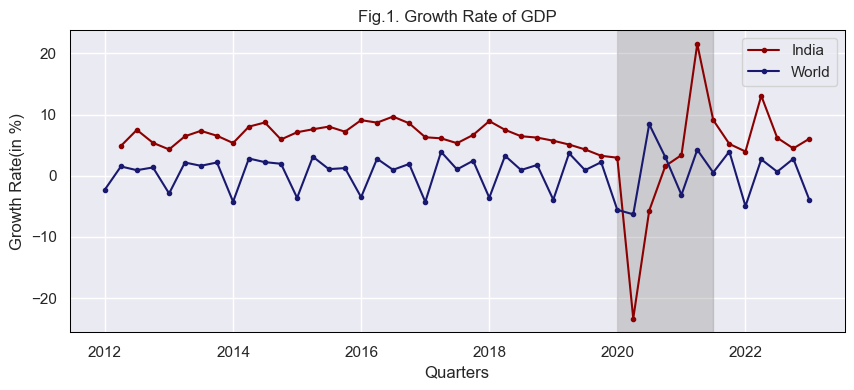

In [11]:
plt.figure(figsize=(10,4), dpi=100)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.75

plt.plot(gr.index, gr.GDP, color='darkred', marker='.', label='India')
plt.plot(world.index, world['GDP_gr '], color='midnightblue', marker='.', label= 'World')
plt.axvspan('2020-01-01', '2021-07-01', color='gray', alpha=0.3)

plt.legend()
plt.ylabel('Growth Rate(in %)')
plt.xlabel('Quarters')
plt.title('Fig.1. Growth Rate of GDP')
plt.show()

In [12]:
aqg =gr.GDP.mean()
print(f'Average Quarterly Growth Rate of India is {aqg:.2f}%')

Average Quarterly Growth Rate is 5.83%


In [13]:
waqg =world['GDP_gr '].mean()
print(f'Average Quarterly Growth Rate of World is {waqg:.2f}%')

Average Quarterly Growth Rate is 0.48%


### COVID-19 Pandemic| Shrinkage in the Output

In [14]:
post_pandemic = gr.loc['2020-07-01':'2022-07-01','GDP'].mean()
print(f"Post-pandemic, the growth rate of Indian quaterly GDP has been: {post_pandemic:.2f}%"  )

Post-pandemic, the growth rate of Indian quaterly GDP has been: 6.48%


### Which sectors have shown most growth?

In [15]:
sectors_gr =gr[['agri', 'mining', 'manufacturing', 'electricity',
       'construction', 'trade', 'financial', 'public_sector'
       #'GDP','govt_spending', 'pvt_consumption',
       #'investment', 'CIS', 'Valuables', 'exports', 'imports',
       #'Discrepancies '
            ]]

<Figure size 1000x600 with 0 Axes>

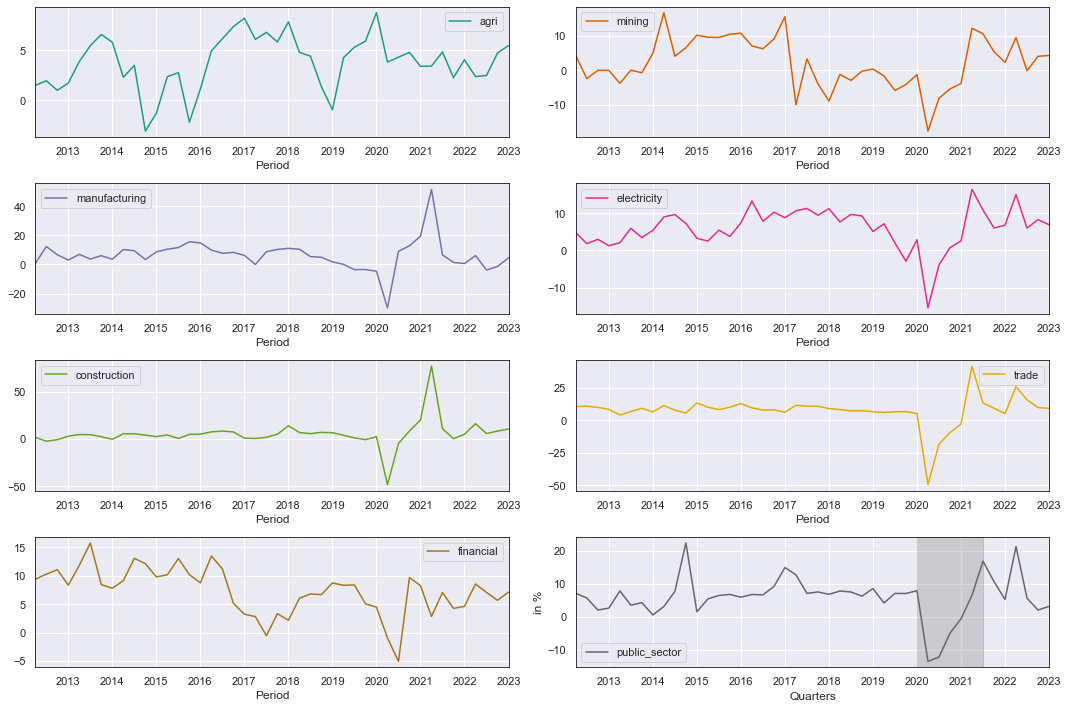

In [16]:
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.75

sectors_gr.plot(subplots= True,layout=(4,2),cmap='Dark2',figsize=(15, 10), sharex=False, sharey= False)
plt.axvspan('2020-01-01', '2021-07-01', color='gray', alpha=0.3)

plt.ylabel('in %')
plt.xlabel('Quarters')

plt.tight_layout()

In [17]:
sectors_gr.mean()

agri             3.789527
mining           2.187643
manufacturing    6.265552
electricity      5.860683
construction     5.221632
trade            7.208165
financial        7.352268
public_sector    5.889128
dtype: float64

Since the de-growth owing to the pandemic, the construction,trade, manufacturing and electricity sectors have revived more robustly.

In [18]:
sectors_gr['2021-01-01':].mean()

agri              3.675714
mining            4.957551
manufacturing     9.419970
electricity       8.706576
construction     17.049941
trade            13.966625
financial         6.157354
public_sector     7.826016
dtype: float64

In [19]:
sectors= data[['agri', 'mining', 'manufacturing', 'electricity',
       'construction', 'trade', 'financial', 'public_sector',
       'GDP'#,'govt_spending', 'pvt_consumption',
       #'investment', 'CIS', 'Valuables', 'exports', 'imports',
       #'Discrepancies '
              ]]

<AxesSubplot:xlabel='Period'>

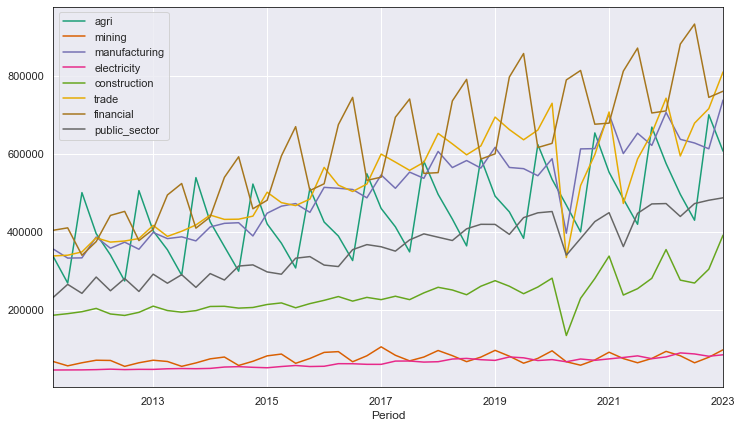

In [20]:
sectors.iloc[:,:-1].plot(figsize=(12,7), cmap= 'Dark2')

<AxesSubplot:xlabel='Period'>

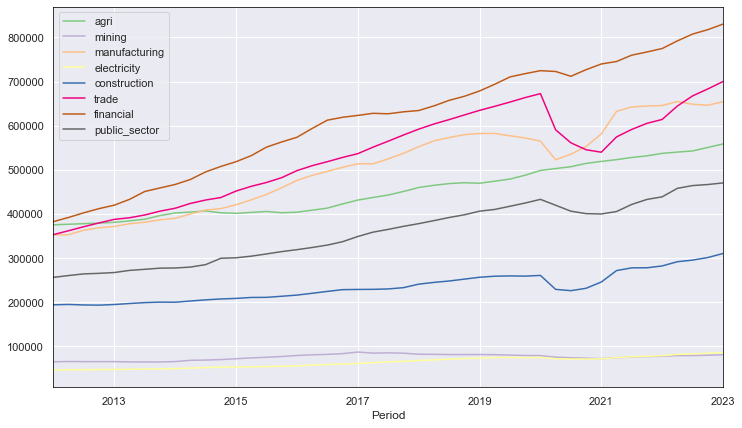

In [21]:
sectors.iloc[:,:-1].rolling(window=4).mean().dropna().plot(figsize=(12,7), cmap= 'Accent')

In [22]:
gr.groupby('Quarter')['agri'].mean()

Quarter
01    4.021348
04    3.619671
07    4.367049
10    3.150040
Name: agri, dtype: float64

### Expenditure Components of GDP
The expenditure approach to GDP depicts the final use(demand) of the output and comprises:
1. Government Final Consumption Expenditure (GFCE) 
2. Private Final Consumption Expenditure(PFCE) 
3. Gross Fixed Capital Formation (GFCF) 
4. Change in Stocks(CIS) 
5. Net Export of Goods & Services

In [23]:
data['net_exports'] = data['exports']-data['imports']

In [24]:
exp= data[[#'agri', 'mining', 'manufacturing', 'electricity',
       #'construction', 'trade', 'financial', 'public_sector',
       'GDP','govt_spending', 'pvt_consumption',
       'investment', #'CIS', 'Valuables', 
       'net_exports' #,'Discrepancies '
            ]]
exp_gr= gr[[#'agri', 'mining', 'manufacturing', 'electricity',
           #'construction', 'trade', 'financial', 'public_sector','GDP',
           'govt_spending', 'pvt_consumption',
           'investment', #'CIS', 'Valuables', 
           'exports', 'imports' #,'Discrepancies '
             ]]

<AxesSubplot:title={'center':'Trends of major components of GDP'}, xlabel='Period'>

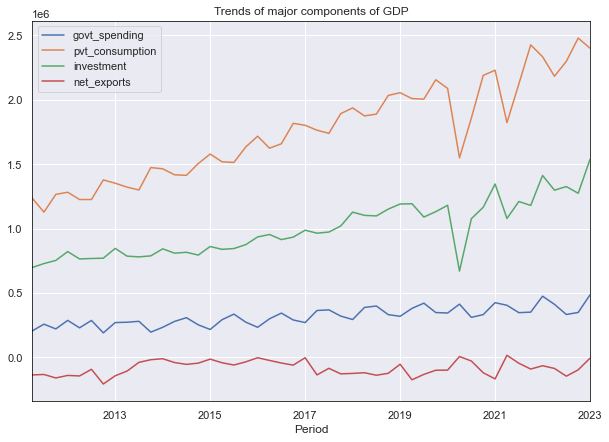

In [25]:
exp.iloc[:,1:].plot(figsize=(10,7), title= 'Trends of major components of GDP')

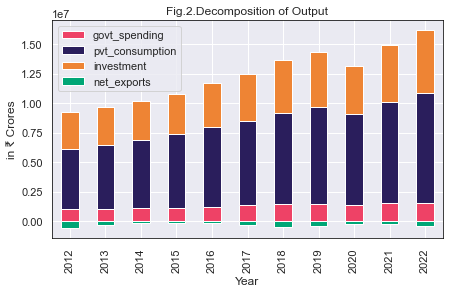

In [26]:
colors= ['#EE4266','#2A1E5C','#EE8434','#00A676']

#Comparing the contribution of major components
data['2012':'2022'].groupby('Year')[['govt_spending', 'pvt_consumption',
       'investment', 'net_exports']]\
   .sum()\
   .plot(kind='bar', stacked= True, color= colors, figsize=(7,4))
plt.title('Fig.2.Decomposition of Output')
plt.ylabel('in ₹ Crores')
plt.show()

- consumption led growth is not reliable 
- investment contribution showuld be more
- why is govt. spending constant ? 
- trade contribution negligible. 

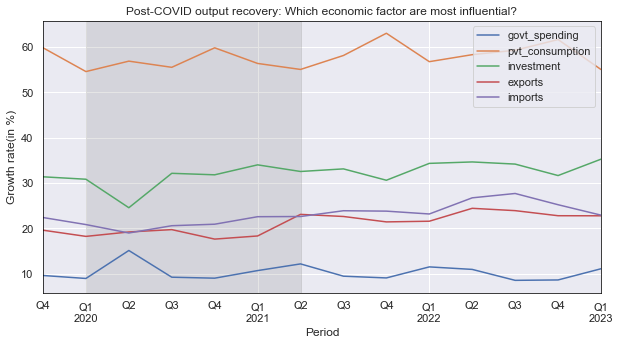

In [27]:
exp_gr['2019-10-01':].plot(figsize= (10,5),title='Post-COVID output recovery: Which economic factor are most influential?')
plt.axvspan('2020-01-01','2021-04-01', color='gray', alpha=0.2)

plt.ylabel('Growth rate(in %)')
plt.show()

### As percentages of GDP

<AxesSubplot:title={'center':'Economic Indicators as % of GDP'}, xlabel='Period'>

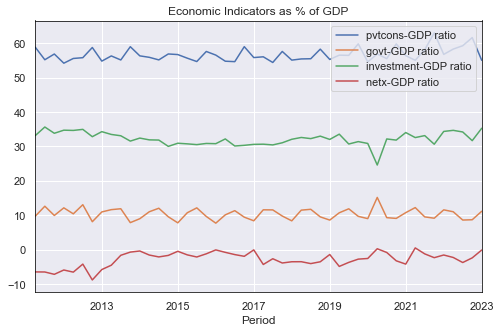

In [28]:
components=pd.DataFrame()
components['pvtcons-GDP ratio'] = (data.pvt_consumption/data.GDP)*100
components['govt-GDP ratio'] = (data.govt_spending/data.GDP)*100
components['investment-GDP ratio'] = (data.investment/data.GDP)*100
components['netx-GDP ratio'] = (data.net_exports/data.GDP)*100


components.plot(figsize=(8,5), title=('Economic Indicators as % of GDP'))

Let's take closer look.


<AxesSubplot:title={'center':'Economic Indicators as % of GDP'}, xlabel='Period'>

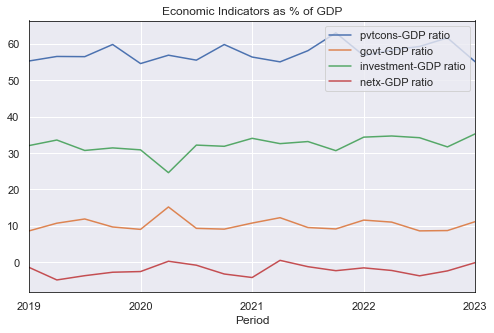

In [29]:
components.loc['2019':,]\
 .plot(figsize=(8,5), title=('Economic Indicators as % of GDP'))

#### Is the GDP growth volatile or stable? 
 Growth in India is mostly consumption and investment-led. Let's check the descriptive statistics of their growth rates. Higher standard deviation indicates more volatility.


In [30]:
components.describe()

,pvtcons-GDP ratio,govt-GDP ratio,investment-GDP ratio,netx-GDP ratio
count,48.000000,48.000000,48.000000,48.000000
mean,56.671585,10.330387,32.174640,-2.860943
std,1.942026,1.597370,1.915213,2.159573
min,54.180148,7.667144,24.571070,-8.845870
25%,55.171209,9.090444,30.827644,-4.129825
50%,56.302550,10.229074,32.104421,-2.396905
75%,57.723963,11.538828,33.483810,-1.405024
max,63.002897,15.149049,35.623846,0.472074


In [31]:
components['2020':]

,pvtcons-GDP ratio,govt-GDP ratio,investment-GDP ratio,netx-GDP ratio
Period,,,,
2020-01-01,54.562037,8.985696,30.845833,-2.605346
2020-04-01,56.860794,15.149049,24.571070,0.225258
2020-07-01,55.500747,9.264984,32.150694,-0.860505
2020-10-01,59.795640,9.050476,31.820726,-3.281793
2021-01-01,56.354627,10.723138,34.014682,-4.243694
2021-04-01,55.030943,12.195773,32.552688,0.472074
2021-07-01,58.106182,9.488870,33.124929,-1.267515
2021-10-01,63.002897,9.103766,30.622966,-2.369872
2022-01-01,56.743605,11.536104,34.338130,-1.594695


Percentage Changes in the expenditure components. Govt_spending and private consumption strong seasonality

array([[<AxesSubplot:xlabel='Period'>, <AxesSubplot:xlabel='Period'>],
       [<AxesSubplot:xlabel='Period'>, <AxesSubplot:xlabel='Period'>]],
      dtype=object)

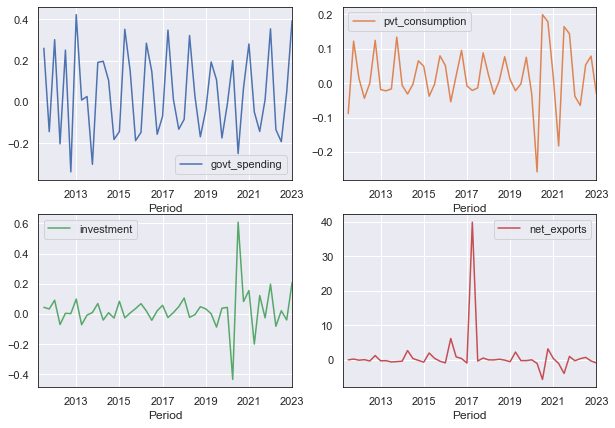

In [32]:
exp.iloc[:,1:].pct_change().plot(subplots=True,sharex= False, sharey= False, layout= (2,2), figsize=(10,7))

array([[<AxesSubplot:xlabel='Period'>, <AxesSubplot:xlabel='Period'>],
       [<AxesSubplot:xlabel='Period'>, <AxesSubplot:xlabel='Period'>]],
      dtype=object)

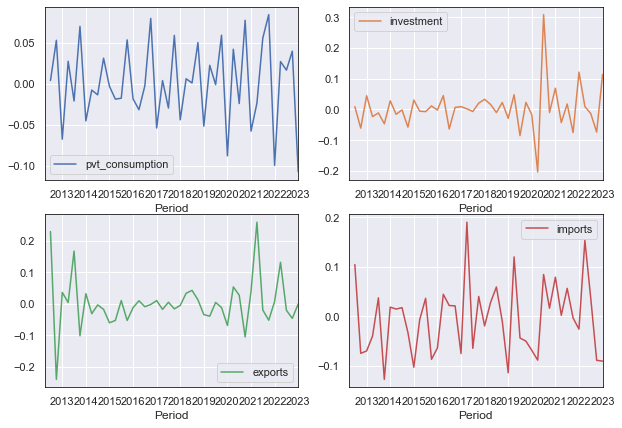

In [33]:
exp_gr.iloc[:,1:].pct_change().plot(subplots=True,sharex= False, sharey= False, layout= (2,2), figsize=(10,7))

### Trade Volume 

<AxesSubplot:title={'center':'Trade Volume'}, xlabel='Period'>

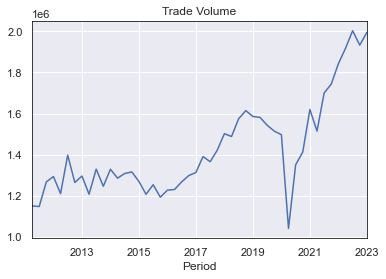

In [34]:
data['trade_volume'] = data['exports']+ data['imports']
data.trade_volume.plot(title= "Trade Volume")

<AxesSubplot:title={'center':'Trade Volume as share of GDP'}, xlabel='Period'>

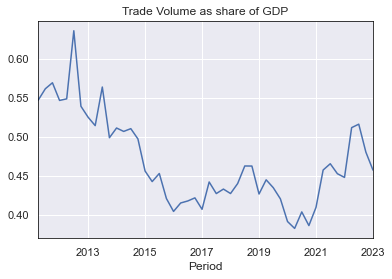

In [35]:
data['trade_volume/gdp ratio'] = data.trade_volume/data.GDP
data['trade_volume/gdp ratio'].plot(title= "Trade Volume as share of GDP")

### Forecasting: Univariate Models
The GDP is non-stationary; it has both trend and seasonality components. So, before trying to fit an ARIMA model, we will take the first difference and make it stationary.

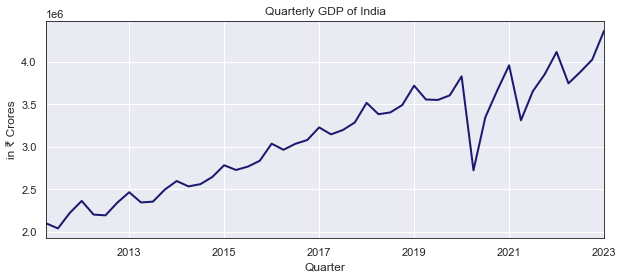

In [36]:
data['GDP'].plot(figsize=(10,4),linewidth= 2,color= 'midnightblue')

plt.title('Quarterly GDP of India')
plt.ylabel('in ₹ Crores')
plt.xlabel('Quarter')
plt.show()

### ADF Test for Stationarity
We can also perform a statistical test like the Augmented Dickey-Fuller test (ADF) to find stationarity of the series using the AIC criteria.

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adfuller_test = adfuller(data['GDP'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -0.31014062429075234
p-value: 0.9240557866148488


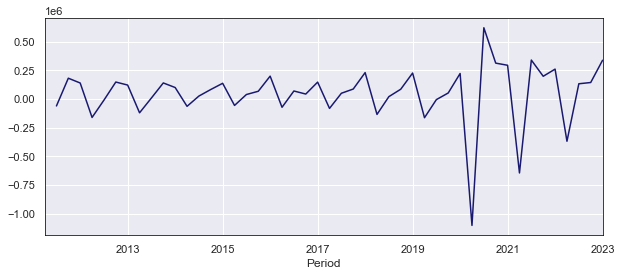

In [39]:
#Let's take the first difference of the GDP series, to get rid of trend and seasonality. 
#Transforming the non-stationary series into a stationary one
gdp_diff = data['GDP'].diff()
gdp_diff.plot(figsize=(10,4),linewidth= 1.5,color= 'midnightblue')
plt.show()

In [40]:
# realgdp series becomes stationary after 1st differencing
gdp_diff= gdp_diff.dropna()
adfuller_test = adfuller(gdp_diff, autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.078893333642366
p-value: 0.0010493216374139957


The ADF test statistic is negative and p-value is less than 0.05,rejecting null hypothesis that series is non-stationary. But,there is still strong seasonality after differencing. There is a need for seasonal differencing. 

Checking the ACF and PACF plots to decide further.

In [41]:
from statsmodels.graphics import tsaplots

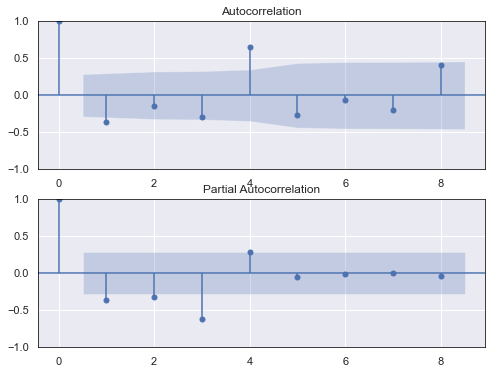

In [42]:
# Creating figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))

tsaplots.plot_acf(gdp_diff, lags=8, ax=ax1)
tsaplots.plot_pacf(gdp_diff, lags=8, ax=ax2,method='ywm')
plt.show()


ACF and PACF becomes statistically insignificant after 4 lags. Also PACF drops sharply after lag=4. So, every 4 units of time, the seasonal component occurs.

Let's try to de-seasonalise this by seasonal differencing (S=4)and  fit a Seasonal ARIMA(SARIMA) Model.

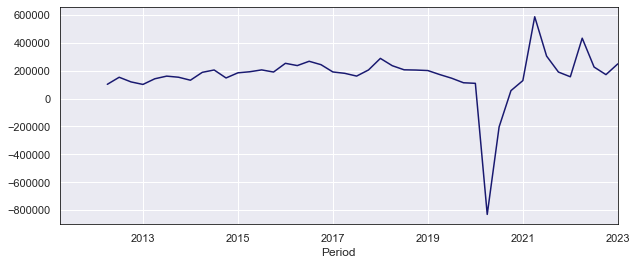

In [43]:
#Taking the seasonal difference with S=4, since it repeats after 4 time periods.
gdp_sdiff = data['GDP'].diff(4)
gdp_sdiff.plot(figsize=(10,4),linewidth= 1.5,color= 'midnightblue')
plt.show()

In [44]:
#ADF Test
gdp_sdiff= gdp_sdiff.dropna()
adfuller_test = adfuller(gdp_sdiff, autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.226668452463436
p-value: 0.000593658877658618


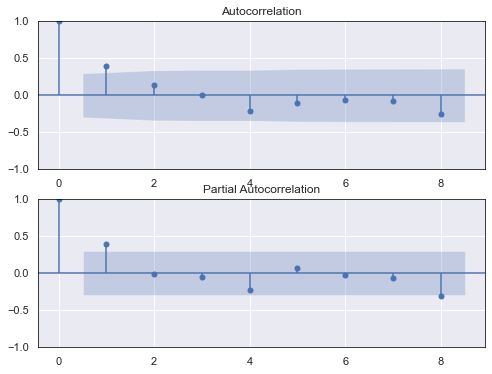

In [45]:
# Creating ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))

tsaplots.plot_acf(gdp_sdiff, lags=8, ax=ax1)
tsaplots.plot_pacf(gdp_sdiff, lags=8, ax=ax2,method='ywm')
plt.show()


In [46]:
#Graph looks better! 

We proceed with a Seasonal ARIMA model (SARIMA).

###  SARIMA(p,d,q)(P,D,Q)S
Here, we know S=4, D=1

Using the AIC metric (which is better at choosing predictive models) we will try to find the seasonal and non-seasonal optimum lag orders!


In [47]:
import pmdarima as pm

In [48]:
results = pm.auto_arima(data['GDP'], # data
                        d=1,# non-seasonal difference order
                        start_p= 1, # initial guess for p
                        start_q= 1,# initial guess for q
                        max_p=5,# max value of p to test
                        max_q=5,# max value of q to test
                        seasonal=True, # is the time series seasonal
                        m=4, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=5, # max value of P to test
                        max_Q=5, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True, # apply intelligent order search 
                       )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=1178.258, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1176.483, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1177.646, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=1177.103, Time=0.03 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=1177.217, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=1177.926, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=1177.748, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=1176.811, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=1176.723, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=1176.388, Time=0.04 sec
 ARIMA(1,1,1)(1,1,0)[4]             : AIC=1178.055, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=1178.983, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[4]             : AIC=1180.666, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[4]             : AIC=1178.387, Time=0.07 sec
 ARIMA(0,1,2)(0,1,0)[4]          

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
# Instantiate model
model = SARIMAX(data['GDP'], order=(1,1,1), seasonal_order=(0,1,0,4))
# Fit model
results = model.fit()
results.summary()

C:\Users\debad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\debad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                GDP   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                -585.194
Date:                            Thu, 06 Jul 2023   AIC                           1176.388
Time:                                    18:56:20   BIC                           1181.672
Sample:                                04-01-2011   HQIC                          1178.337
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8212      0.159      5.169      0.000       0.510       1.133
ma.L1         -0.9777      0.170     -5.741      0.000      -1.311      -0.644
sigma2      4.115e+10   4.39e-12   9.37e+21      0.000    4.12e+10    4.12e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.12   Jarque-Bera (JB):               289.63
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):              29.88   Skew:                            -1.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+37. Standard errors may be unstable.
"""

### Model Evaluation

 1. Residual Diagnostics

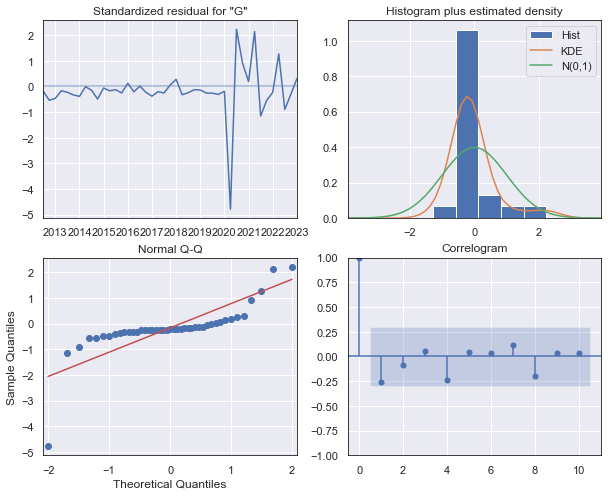

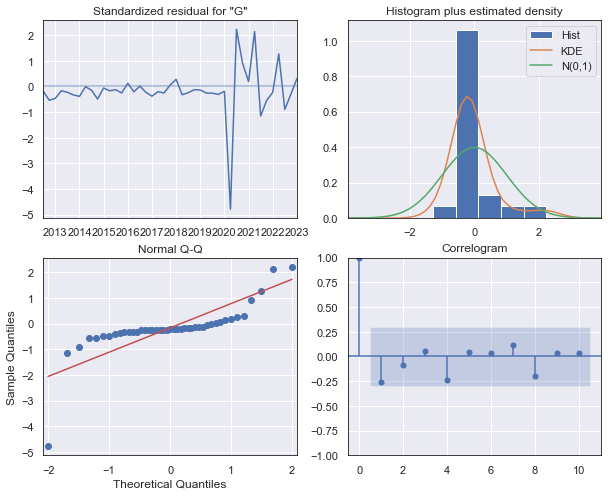

In [51]:
results.plot_diagnostics(figsize=(10,8))

2. Mean Absolute Error , Mean Squared Error & Root Mean Squared Error of Forecasts
  
  #### In-sample forecasting

In [52]:
forecast = results.get_prediction(start=-12)
mean_forecast =forecast.predicted_mean

confidence_intervals = forecast.conf_int()

lower_limits=confidence_intervals['lower GDP']
upper_limits=confidence_intervals['upper GDP']

In [53]:
confidence_intervals

,lower GDP,upper GDP
2020-04-01,3.299432e+06,4.097116e+06
2020-07-01,2.495170e+06,3.292730e+06
2020-10-01,3.076577e+06,3.874020e+06
2021-01-01,3.518936e+06,4.316267e+06
2021-04-01,2.476423e+06,3.273650e+06
2021-07-01,3.487104e+06,4.284232e+06
2021-10-01,3.563026e+06,4.360060e+06
2022-01-01,3.761084e+06,4.558030e+06
2022-04-01,3.087535e+06,3.884396e+06
2022-07-01,3.662182e+06,4.458964e+06


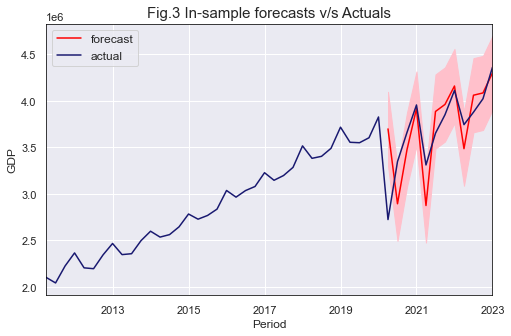

In [54]:
plt.figure(figsize = (8,5))

# Plot prediction
ax=  mean_forecast.plot(color= 'red', label='forecast')
ax =  data['GDP'].plot(color='midnightblue',label= 'actual')
plt.legend(loc= 'upper left', fontsize= 'medium', frameon = True)


# Shade uncertainty area
plt.fill_between(data.index[-12:], lower_limits, upper_limits, color='pink')
plt.ylabel('GDP')
plt.title('Fig.3 In-sample forecasts v/s Actuals', fontsize=15)
plt.show()


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
test = data[-12:]

mae =mean_absolute_error(test.GDP,mean_forecast )
mse = mean_squared_error(test.GDP,mean_forecast )
rmse = np.sqrt(mse)

print(f"Mean Absolute Error:{mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}") 


Mean Absolute Error:253587.26
Mean Squared Error: 129753242454.35
Root Mean Squared Error:360212.77


### Out-of-sample Forecasting

In [57]:
forecast_outsample =results.get_forecast(steps=4)
mean_forecast_outsample =forecast_outsample.predicted_mean

confidence_intervals = forecast_outsample.conf_int()

lower_limits=confidence_intervals['lower GDP']
upper_limits=confidence_intervals['upper GDP']

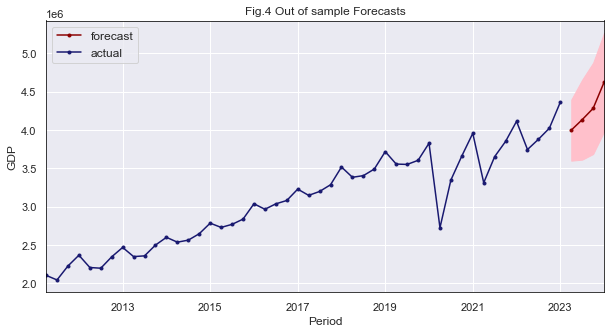

In [58]:

plt.figure(figsize = (10,5))

ax=  mean_forecast_outsample.plot(color= 'darkred',label='forecast', marker='.')

ax =  data['GDP'].plot(color='midnightblue',label= 'actual', marker='.')
plt.legend(loc= 'upper left', fontsize= 'medium', frameon = True)

# Shade uncertainty area
plt.fill_between(mean_forecast_outsample.index, lower_limits, upper_limits, color='pink')
plt.ylabel('GDP')
plt.title('Fig.4 Out of sample Forecasts')
plt.show()


In [59]:
outsample= pd.DataFrame(mean_forecast_outsample)
outsample

,predicted_mean
2023-04-01,3.997217e+06
2023-07-01,4.134034e+06
2023-10-01,4.281206e+06
2024-01-01,4.622187e+06


In [60]:
mean_forecast_outsample

2023-04-01    3.997217e+06
2023-07-01    4.134034e+06
2023-10-01    4.281206e+06
2024-01-01    4.622187e+06
Freq: QS-OCT, Name: predicted_mean, dtype: float64

### Multivariate Approach
The expenditure approach GDP depicts the final use(demand) of the output and comprises
1. Government Final Consumption Expenditure (GFCE) 
2. Private Final Consumption Expenditure(PFCE) 
3. Gross Fixed Capital Formation (GFCF) 
4. Change in Stocks(CIS) 
5. Net Export of Goods & Services

<b>To forecast GDP, we will build a VAR model (Vector Autoregressive Model).<b/> <br/>

Based on theory of Keynesian Demand,economic output is determined by the real sector variables:
* Government Spending 
* Private Consumption 
* Investment 
* Trade Balance 
<br/>
These will comprise the multivariate VAR model. 

### Visualising the data

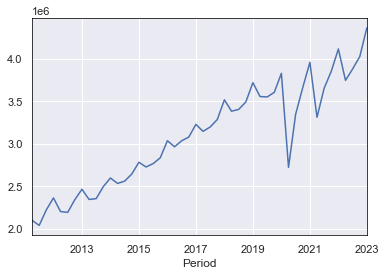

In [61]:
data.GDP.plot()
plt.show()

<AxesSubplot:xlabel='Period'>

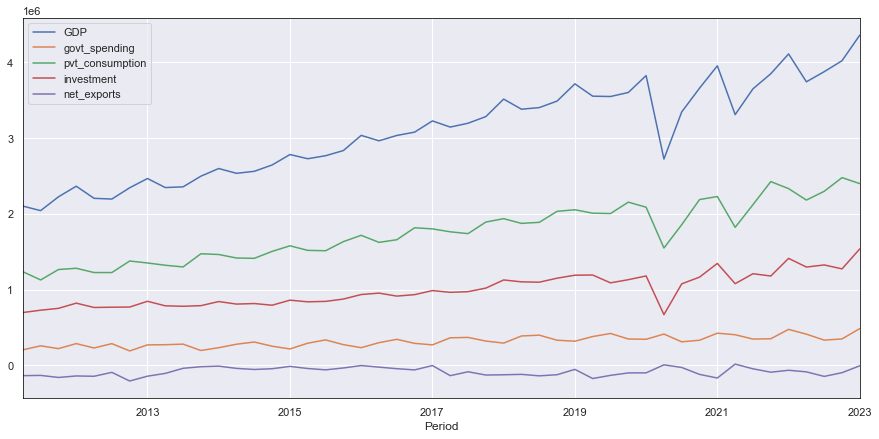

In [62]:
variables = pd.DataFrame(data[['GDP','govt_spending','pvt_consumption','investment','net_exports']])
variables.plot(figsize=(15,7))

At first glance, GDP, Private Consumption and Investment exhibit trend ,i.e, they are non-stationary.

### Checking for stationarity using ADF Test

In [63]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [64]:
# ADF Test on each column
for name, column in variables.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.3101
 No. Lags Chosen       = 4
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.9241. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "govt_spending" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2978
 No. Lags Chosen       = 3
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.9258. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pvt_consumption" 
    -----------------------------------------------
 Null Hypothesis

<b>GDP, govt_spending, pvt_consumption and investment</b> are all <b>Non-Stationary</b>. We will take the 1st difference of these series and check for stationarity again.

In [65]:
# 1st difference
variables_differenced = variables.diff().dropna()

#Adding the net_exports column which is stationary at I(0)
#variables_differenced['net_exports'] = variables['net_exports']


In [66]:
# ADF Test again
for name, column in variables_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0789
 No. Lags Chosen       = 3
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "govt_spending" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.8282
 No. Lags Chosen       = 2
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pvt_consumption" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

Every variable is stationary now. Moving on!

#### 1.We will split the dataset into train-test    |  2.Test Causation using Granger’s Causality Test   |     3.Cointegration Test

In [67]:
#Leaving out the last 4 quarters of data for tesing

variables_train= variables_differenced[:-6]
variables_test = variables_differenced[-6:]
variables_test

,GDP,govt_spending,pvt_consumption,investment,net_exports
Period,,,,,
2021-10-01,199113.069223,4064.101810,304258.327567,-30388.796054,-44973.030196
2022-01-01,261588.357136,123840.865668,-92596.404914,232887.015539,25678.757826
2022-04-01,-368074.696542,-63163.467315,-151144.370098,-114519.354331,-20880.875748
2022-07-01,133714.732618,-78792.681609,115765.951160,27991.443320,-60163.070711
2022-10-01,144625.022713,15878.721970,180576.549055,-52126.804373,49117.582601
2023-01-01,338889.299632,136955.634716,-79184.691811,264617.686165,91242.413329


### Granger Causality Test

In [68]:
from statsmodels.tsa.stattools import grangercausalitytests

In [69]:
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df 

In [70]:
grangers_causation_matrix(variables_train,variables = variables_train.columns) 

,GDP_x,govt_spending_x,pvt_consumption_x,investment_x,net_exports_x
GDP_y,1.0,0.0101,0.0,0.0001,0.0045
govt_spending_y,0.0,1.0000,0.0,0.0000,0.0000
pvt_consumption_y,0.0,0.1234,1.0,0.0000,0.0000
investment_y,0.0,0.0010,0.0,1.0000,0.0028
net_exports_y,0.0,0.0000,0.0,0.0000,1.0000


Looking at the p-values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

### Johanssen Cointegration Test

In [71]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [72]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name::  Test Stat > C(95%)=> Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col),'::',adjust(round(trace,2), 9), ">", adjust(cvt, 8), '=>' , trace > cvt)

In [73]:
cointegration_test(variables_train)

Name::  Test Stat > C(95%)=> Signif  
 ----------------------------------------
GDP    :: 189.95    > 60.0627  => True
govt_spending :: 101.64    > 40.1749  => True
pvt_consumption :: 40.54     > 24.2761  => True
investment :: 8.11      > 12.3212  => False
net_exports :: 0.5       > 4.1296   => False


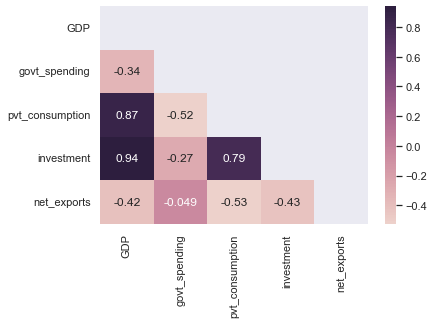

In [74]:
corr_mat = variables_train.corr(method='pearson')
mask= np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, annot= True, mask= mask,cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

###  To select the Order (P) of VAR model

In [75]:
from statsmodels.tsa.api import VAR

To build a parsimonious model, we take max lags = 5


In [76]:
model = VAR(variables_train)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print(' *Lag Order =', i)
    
    print('  AIC:', result.aic)
    
    print('  BIC:', result.bic)

 *Lag Order = 1
  AIC: 110.00859292974715
  BIC: 111.2752525203326
 *Lag Order = 2
  AIC: 108.86666460701119
  BIC: 111.21271308232222
 *Lag Order = 3
  AIC: 106.56638308646473
  BIC: 110.013932896415
 *Lag Order = 4
  AIC: 105.67321466241316
  BIC: 110.24473846856569
 *Lag Order = 5
  AIC: 106.08409641706172
  BIC: 111.80235925037545


C:\Users\debad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Based on the minimum values of AIC and BIC, the lag length of 4 is chosen.

In [77]:
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,112.0,112.2,4.404e+48,112.1
1,110.1,111.4,6.747e+47,110.6
2,108.8,111.2,1.977e+47,109.6
3,107.0,110.5,3.994e+46,108.2
4,105.8*,110.4*,2.069e+46*,107.4*
5,106.1,111.8,7.891e+46,108.1


### Fitting the VAR Model of Selected Order(4)

In [78]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Jul, 2023
Time:                     18:56:23
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    111.275
Nobs:                     40.0000    HQIC:                   110.467
Log likelihood:          -2453.96    FPE:                6.04057e+47
AIC:                      110.009    Det(Omega_mle):     3.00323e+47
--------------------------------------------------------------------
Results for equation GDP
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                  50731.109080     28910.726059            1.755           0.079
L1.GDP                    -2.235180         0.399942           -5.589           0.000
L1.govt_spending           0.153226       

### Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [79]:
from statsmodels.stats.stattools import durbin_watson


In [80]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(variables_train.columns, out):
    print(col, ':', round(val, 2))

GDP : 2.03
govt_spending : 2.44
pvt_consumption : 2.14
investment : 2.03
net_exports : 2.15


### Forecasting and Model Evaluation

In [81]:
# Forecast
fc = model_fitted.forecast(y=variables_test.values, steps=6)
df_forecast = pd.DataFrame(fc, index=variables_test.index, columns=variables_test.columns + '_1D')
df_forecast

,GDP_1D,govt_spending_1D,pvt_consumption_1D,investment_1D,net_exports_1D
Period,,,,,
2021-10-01,-418917.439876,-28968.254768,-57236.709399,-249890.966003,-61353.211464
2022-01-01,414282.277899,-1566.214388,118934.794467,212593.466679,50766.501424
2022-04-01,-209059.885620,14790.703817,-44047.912074,-119841.789006,-32705.339685
2022-07-01,200003.412447,-6436.350448,65588.983919,96978.083436,26785.101578
2022-10-01,-58995.084685,9423.153588,-2170.182934,-40127.462413,-13626.000988
2023-01-01,106557.496032,-956.739403,40204.442162,47048.338256,12912.240739


<b>NOTE:</b> Above forecasts are for the one differenced model. Hence, we must reverse the first differenced forecasts into the original forecast values

In [82]:
forecast= df_forecast.copy()
df_forecast["GDP_forecasted"]= variables_train["GDP"].iloc[-1] + forecast['GDP_1D'].cumsum()
df_forecast["govt_spending_forecasted"]= variables_train["govt_spending"].iloc[-1]+ forecast['govt_spending_1D'].cumsum()
df_forecast["pvt_consumption_forecasted"]= variables_train["pvt_consumption"].iloc[-1]+ forecast['pvt_consumption_1D'].cumsum()
df_forecast["investment_forecasted"]= variables_train["investment"].iloc[-1] + forecast['investment_1D'].cumsum()
df_forecast["net_exports_forecasted"]= variables_train["net_exports"].iloc[-1] + forecast['net_exports_1D'].cumsum()

df_forecast

,GDP_1D,govt_spending_1D,pvt_consumption_1D,investment_1D,net_exports_1D,GDP_forecasted,govt_spending_forecasted,pvt_consumption_forecasted,investment_forecasted,net_exports_forecasted
Period,,,,,,,,,,
2021-10-01,-418917.439876,-28968.254768,-57236.709399,-249890.966003,-61353.211464,-78308.344865,-86275.187655,242500.934243,-118117.285805,-123269.145641
2022-01-01,414282.277899,-1566.214388,118934.794467,212593.466679,50766.501424,335973.933034,-87841.402043,361435.728709,94476.180874,-72502.644217
2022-04-01,-209059.885620,14790.703817,-44047.912074,-119841.789006,-32705.339685,126914.047414,-73050.698226,317387.816635,-25365.608132,-105207.983902
2022-07-01,200003.412447,-6436.350448,65588.983919,96978.083436,26785.101578,326917.459861,-79487.048675,382976.800554,71612.475303,-78422.882324
2022-10-01,-58995.084685,9423.153588,-2170.182934,-40127.462413,-13626.000988,267922.375176,-70063.895086,380806.617620,31485.012890,-92048.883312
2023-01-01,106557.496032,-956.739403,40204.442162,47048.338256,12912.240739,374479.871208,-71020.634489,421011.059782,78533.351146,-79136.642573


In [83]:
df_forecast = df_forecast.iloc[:,-5:]

### Forecast v/s Actuals

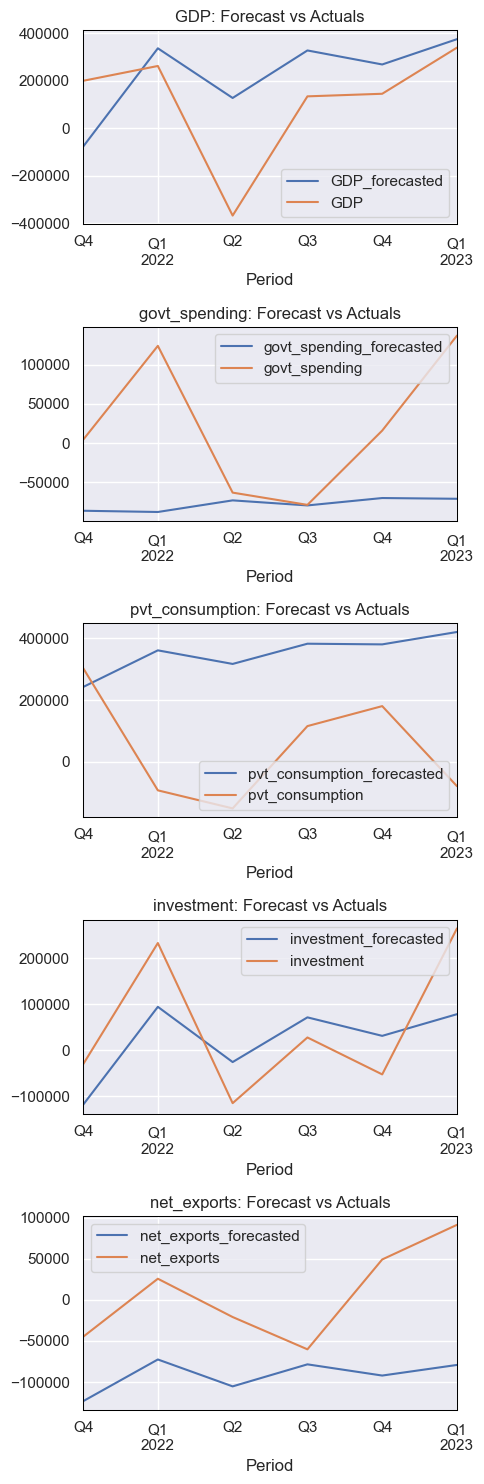

In [84]:
fig, axes = plt.subplots(nrows=int(len(variables.columns)), ncols=1, dpi=100, figsize=(5,15))

for i, (col,ax) in enumerate(zip(variables.columns, axes.flatten())):
    
    df_forecast[col+ '_forecasted'].plot(legend=True, ax=ax).autoscale(axis='x')
    variables_test[col][-6:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    

plt.tight_layout();


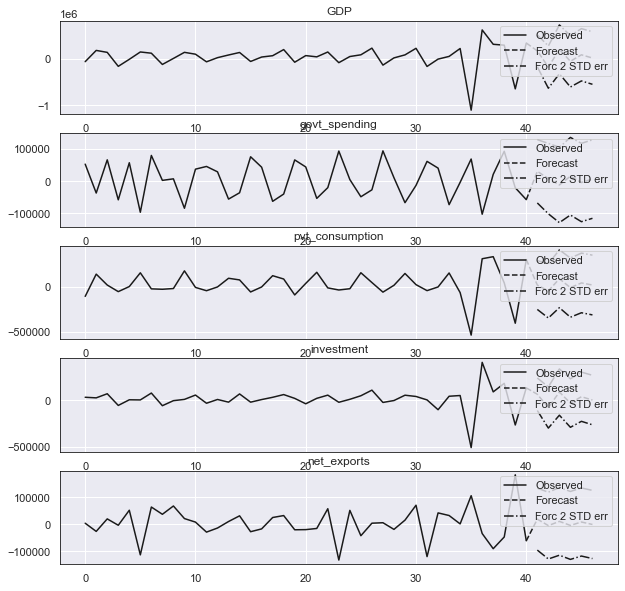

<Figure size 576x720 with 0 Axes>

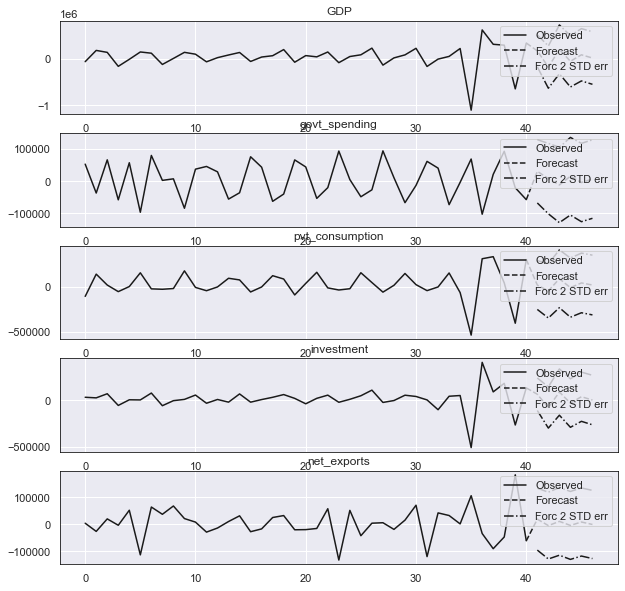

In [85]:
plt.figure(figsize=(8,10))
model_fitted.plot_forecast(6)

### Model Accuracy 
To evaluate the accuracy of forecast we examine the metrics : Mean Absolute Error(MAE) and Root Mean Squared Error(RMSE)

In [86]:
def forecast_accuracy(forecast, actual):
   
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return({'MAE': mae, 'RSME':rmse})



In [87]:
print('Forecast Accuracy of: GDP')
accuracy_prod = forecast_accuracy(variables_test['GDP'],df_forecast['GDP_forecasted'].values)
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: GDP
MAE :  199814.3975
RSME :  252093.214


### Out-sample Forecasting 
  (for next 4 quarters)

In [88]:
outsample = model_fitted.forecast(y=variables.values, steps=3)
outsample= pd.DataFrame(fc,columns=variables.columns + '_1D')


In [89]:
forecast= outsample.copy()
outsample["GDP_forecasted"]= variables["GDP"].iloc[-1] + forecast['GDP_1D'].cumsum()
outsample

,GDP_1D,govt_spending_1D,pvt_consumption_1D,investment_1D,net_exports_1D,GDP_forecasted
0,-418917.439876,-28968.254768,-57236.709399,-249890.966003,-61353.211464,3.942597e+06
1,414282.277899,-1566.214388,118934.794467,212593.466679,50766.501424,4.356879e+06
2,-209059.885620,14790.703817,-44047.912074,-119841.789006,-32705.339685,4.147819e+06
3,200003.412447,-6436.350448,65588.983919,96978.083436,26785.101578,4.347823e+06
4,-58995.084685,9423.153588,-2170.182934,-40127.462413,-13626.000988,4.288828e+06
5,106557.496032,-956.739403,40204.442162,47048.338256,12912.240739,4.395385e+06


### SARIMA

* Mean Absolute Error: 253587.25
* Mean Squared Error:  129753242454.35
* Root Mean Squared Error:  360212.77


### VAR(1)
Forecast Accuracy of: GDP
* MAE :  199814.3975
* RSME :  252093.214


### VAR(3)
Forecast Accuracy of: GDP

mae :  534490.2637

rmse :  583487.5905

### VAR(4)
Forecast Accuracy of: GDP

mae :  521991.0766

rmse :  624689.3087

### Impulse Response Functions

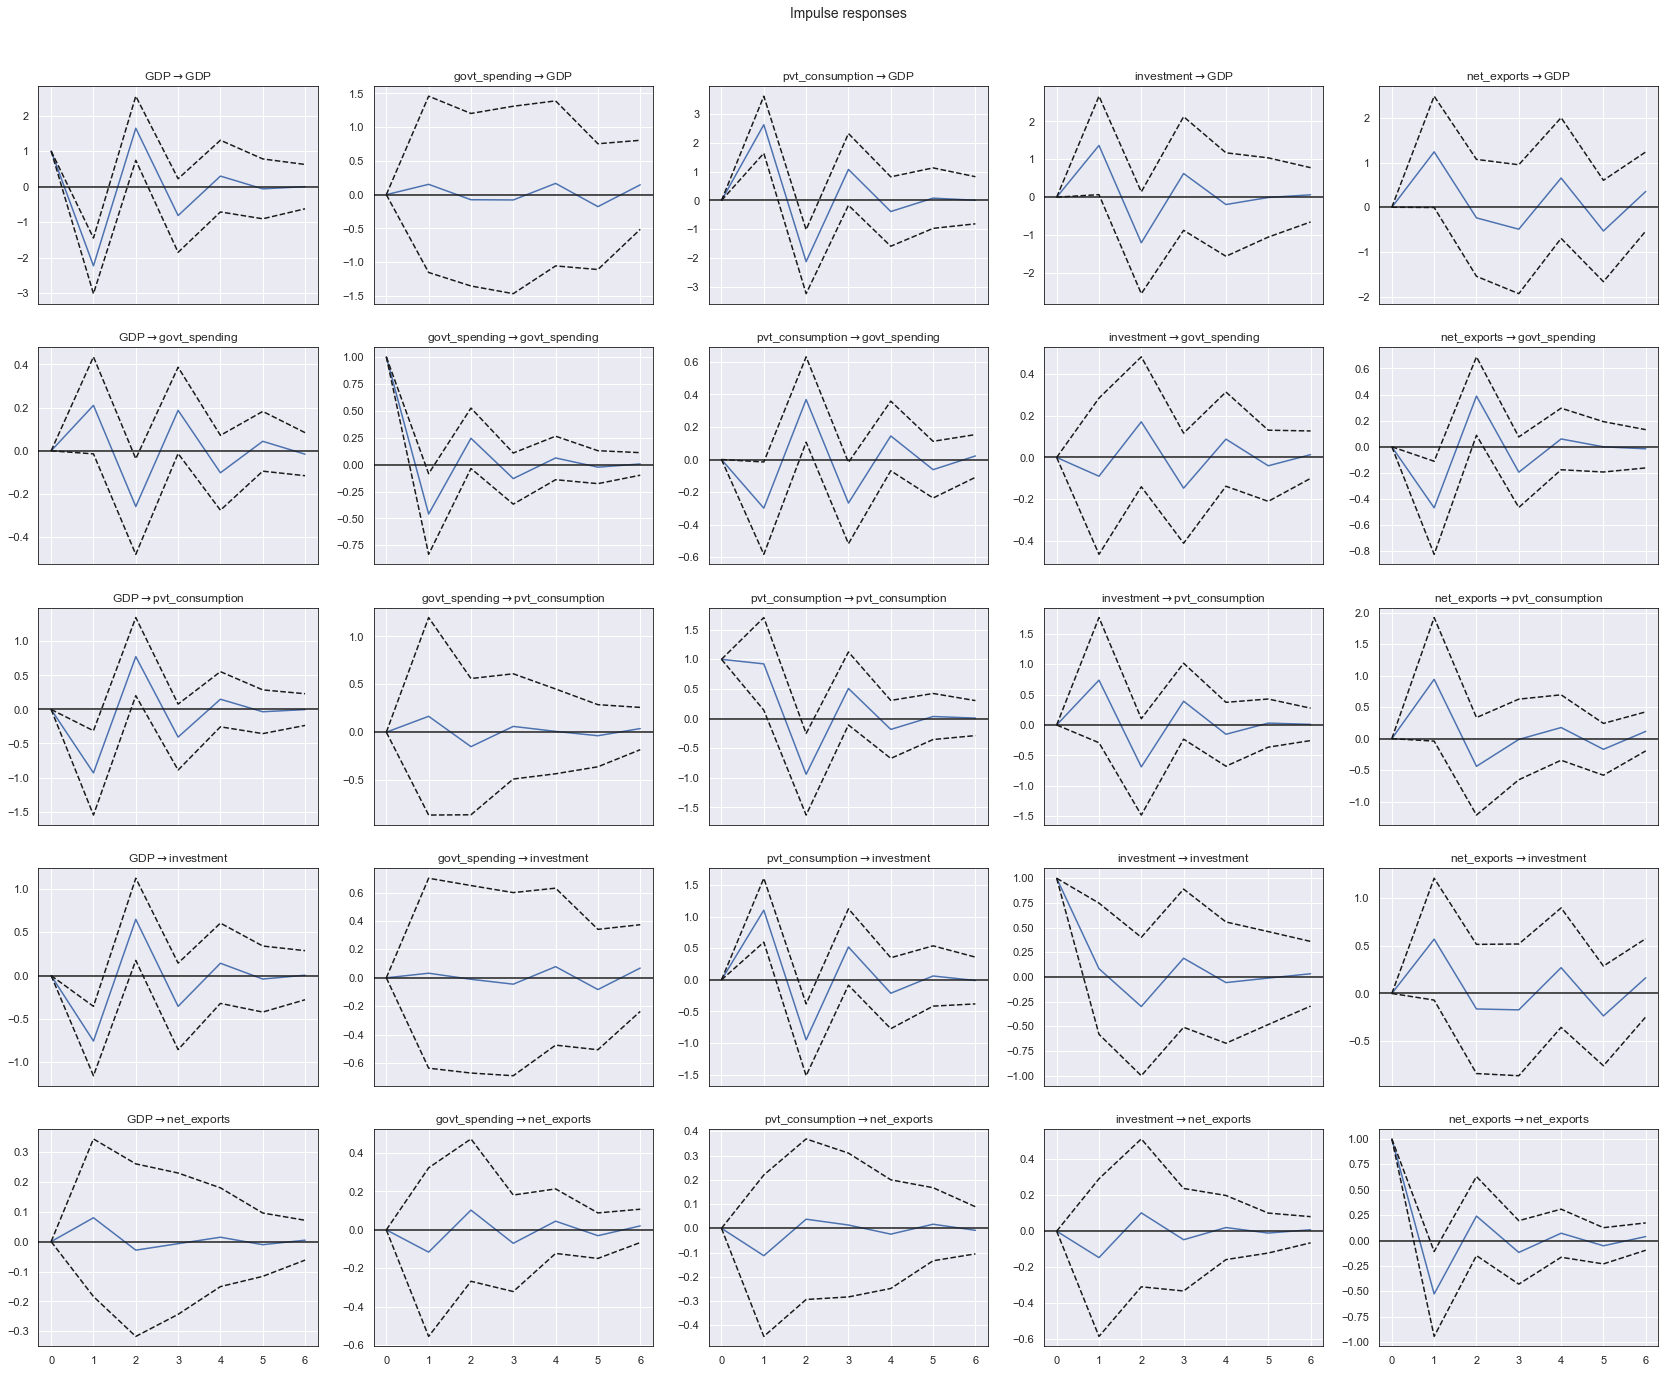

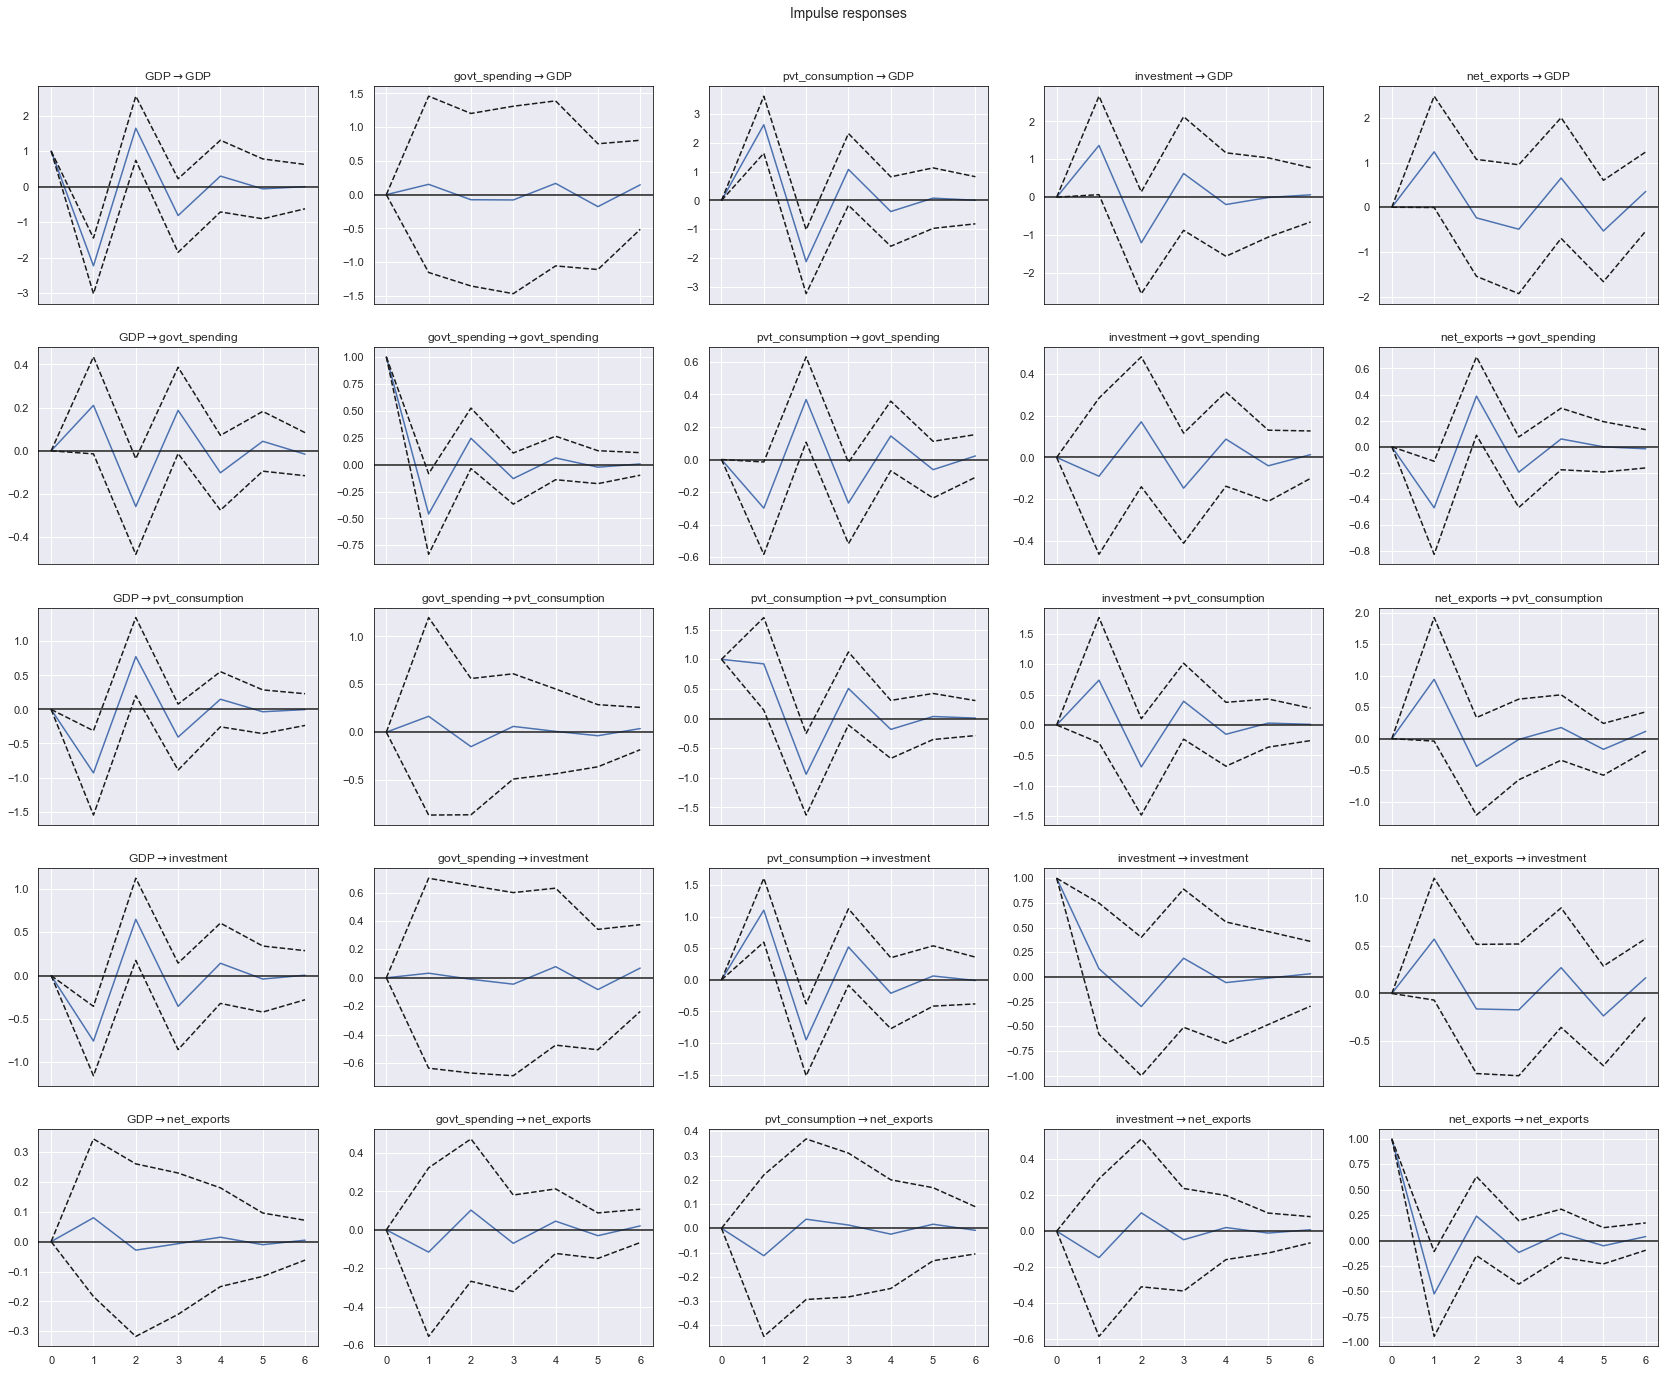

In [90]:
irf = model_fitted.irf(6)

irf.plot(orth=False, figsize=(25,20))

### Forecast Error Variance Decomposition

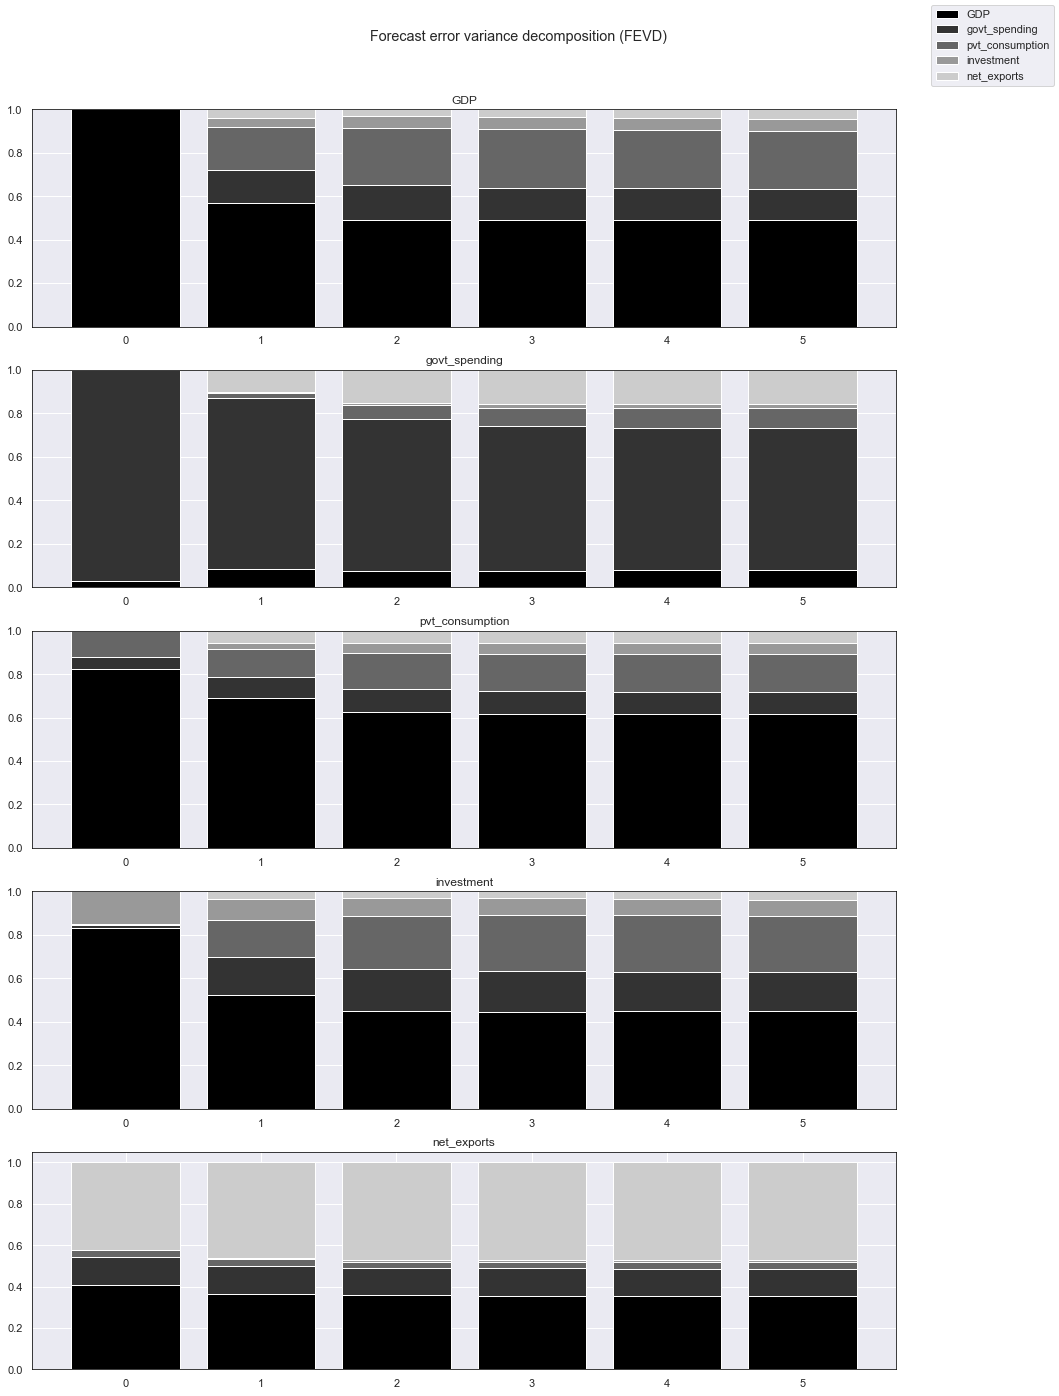

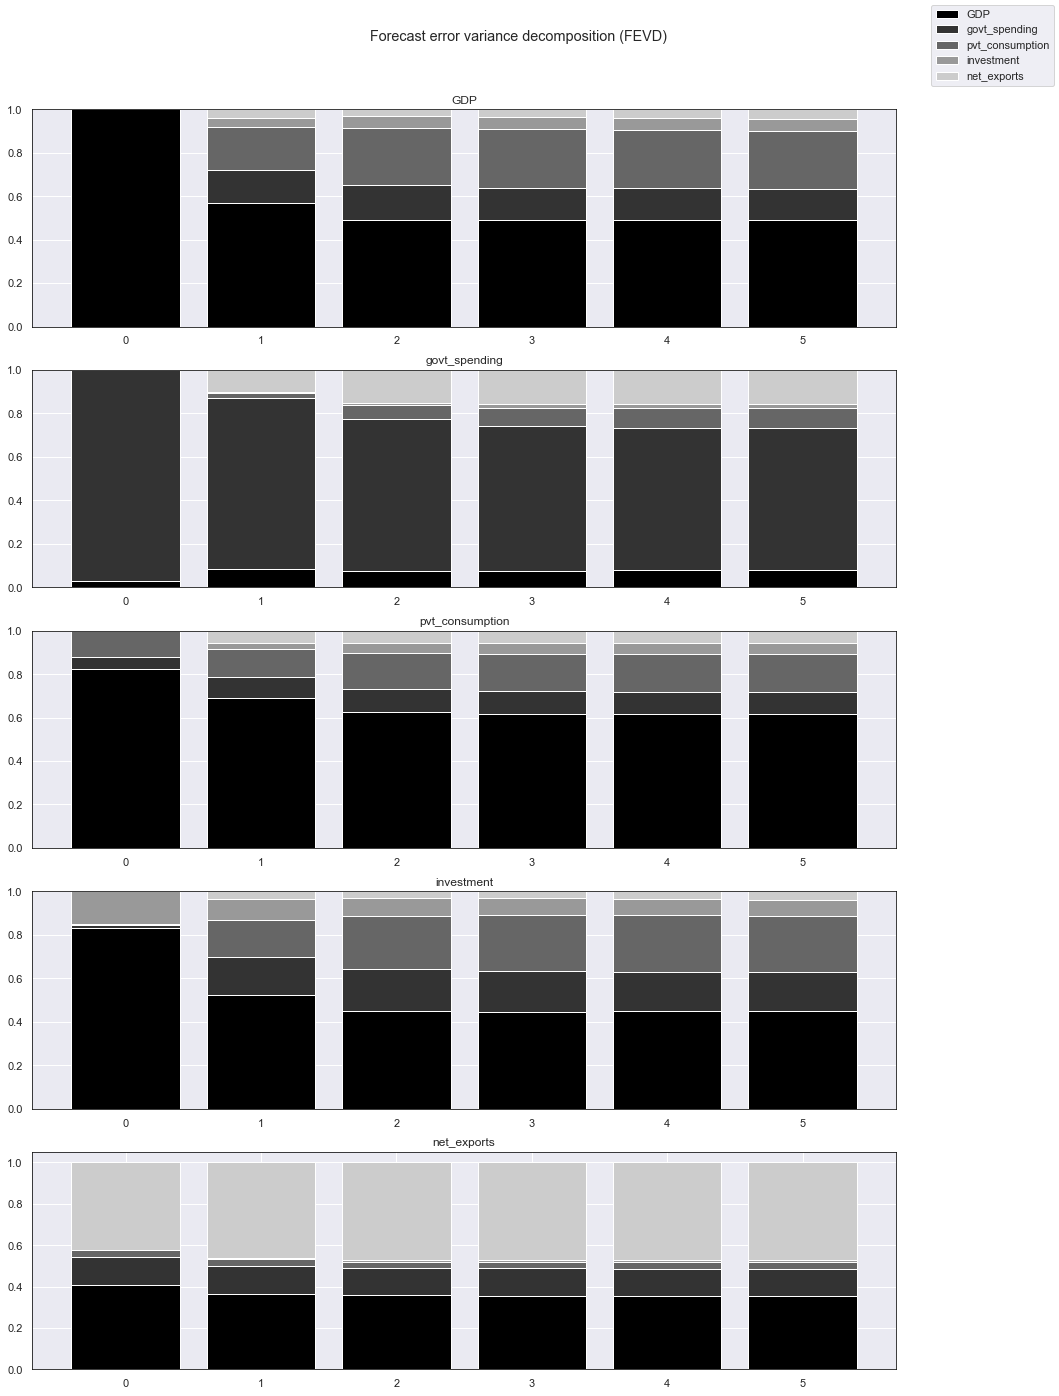

In [91]:
model_fitted.fevd(periods=6).plot(figsize= (15,20))

In [92]:
model_fitted.fevd(periods=6).summary()

FEVD for GDP
          GDP  govt_spending  pvt_consumption  investment  net_exports
0    1.000000       0.000000         0.000000    0.000000     0.000000
1    0.569668       0.150145         0.197220    0.041365     0.041602
2    0.491192       0.158311         0.262909    0.055219     0.032370
3    0.491015       0.148244         0.271517    0.055654     0.033569
4    0.492579       0.143516         0.269531    0.054357     0.040016
5    0.491904       0.141996         0.267801    0.053782     0.044517

FEVD for govt_spending
          GDP  govt_spending  pvt_consumption  investment  net_exports
0    0.029855       0.970145         0.000000    0.000000     0.000000
1    0.082675       0.787996         0.024073    0.002971     0.102285
2    0.073083       0.700424         0.063227    0.012151     0.151115
3    0.073767       0.666629         0.084378    0.018188     0.157038
4    0.078116       0.655114         0.091120    0.020210     0.155440
5    0.080241       0.651928         0.0